In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

In [15]:

#IMPORT DATASET
dataset = np.genfromtxt('C:/Users/hp/Desktop/FYP/MlDataset/housing_prices.txt', delimiter=',')


In [16]:
#SET X AND Y
X = dataset[:,0]
Y = dataset[:,2]
m=len(X)

#NORMALIZE X AND BY Z-SCORE METHOD
mean_size = np.mean(X)
size_std = np.std(X)
X = (X - mean_size)/ (size_std)
print(X)


mean_size = np.mean(Y)
size_std = np.std(Y)
Y = (Y - mean_size)/ (size_std)
print(Y)

[ 1.31415422e-01 -5.09640698e-01  5.07908699e-01 -7.43677059e-01
  1.27107075e+00 -1.99450507e-02 -5.93588523e-01 -7.29685755e-01
 -7.89466782e-01 -6.44465993e-01 -7.71822042e-02 -8.65999486e-04
 -1.40779041e-01  3.15099326e+00 -9.31923697e-01  3.80715024e-01
 -8.65782986e-01 -9.72625673e-01  7.73743478e-01  1.31050078e+00
 -2.97227261e-01 -1.43322915e-01 -5.04552951e-01 -4.91995958e-02
  2.40309445e+00 -1.14560907e+00 -6.90255715e-01  6.68172729e-01
  2.53521350e-01  8.09357707e-01 -2.05647815e-01 -1.27280274e+00
  5.00114703e-02  1.44532608e+00 -2.41262044e-01 -7.16966387e-01
 -9.68809863e-01  1.67029651e-01  2.81647389e+00  2.05187753e-01
 -4.28236746e-01  3.01854946e-01  7.20322135e-01 -1.01841540e+00
 -1.46104938e+00 -1.89112638e-01 -1.01459959e+00]
[ 0.48089023 -0.08498338  0.23109745 -0.87639804  1.61263744 -0.32750064
 -0.20624201 -1.1431751  -1.03807621 -0.791517   -0.81173485  0.05325146
 -0.08418307  2.90606282 -0.65085698  0.88508566 -0.32750064 -1.1358915
  1.29007331  2.0

In [4]:

#INITIALIZE COST AND ERROR ARRAY AND THEETA
import random
k=1.02
costArr=[]
err=[]
alpha=0.1
theeta=[]



#FUNCTION TO CALCULATE NEW PREDICTION
def y_predict(k,x):
    return k*x


#FUNCTION TO CALCULATE COST
def cost(k,Y,X):
    sum=0
    for i in range(m):
        sum=sum+pow((y_predict(k,X[i])-Y[i]),2)
    return sum/2*m

#FUNCTION TO CALCULATE GARDIENT
def gradient(k,X,Y):
    sum=0
    for i in range(m):
        sum=sum+((y_predict(k,X[i])-Y[i])*X[i])
    return sum/m

#FUNCTION TO CALCULATE MINIMUM THEETA 
def gradientDescendent(X,Y,k,alpha):
    for i in range(1000):
        theeta.append(k)
        temp=k
        costArr.append(cost(k,Y,X))
        k=k-(alpha*gradient(k,X,Y))
        err.append(temp-k)
        if(temp-k<0.0000005):
            return k

k=gradientDescendent(X,Y,k,alpha)
k=round(k,2)
print('Minimum Value of Theeta 1 is:',k)
print('Cost At Theeta 1 is: ',min(costArr))




    

Minimum Value of Theeta 1 is: 0.85
Cost At Theeta 1 is:  297.1063206252213


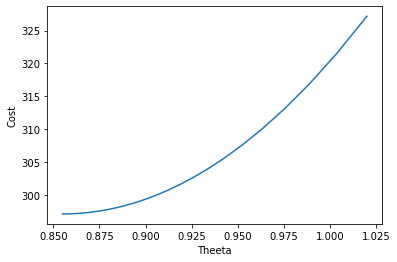

In [5]:

plt.plot(theeta,costArr)
plt.xlabel('Theeta')
plt.ylabel('Cost')
plt.show()

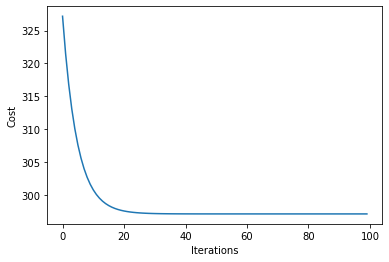

In [6]:
plt.plot(range(0,len(costArr)),costArr)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

In [7]:

#INITIALIZE COST AND ERROR ARRAY AND THEETA
import random
k=2.1
k0=2.1
costArr=[]
err=[]
alpha=0.1
theeta=[]
theeta0=[]


#FUNCTION TO CALCULATE NEW PREDICTION
def multiPredict(k,k0,x):
    return k0+k*x


#FUNCTION TO CALCULATE COST
def multiCost(k,k0,Y,X):
    sum=0
    for i in range(m):
        sum=sum+pow((multiPredict(k,k0,X[i])-Y[i]),2)
    return sum/2*m

#FUNCTION TO CALCULATE GARDIENT
def gradient1(k,k0,X,Y):
    sum=0
    for i in range(m):
        sum=sum+((multiPredict(k,k0,X[i])-Y[i])*X[i])
    return sum/m

#FUNCTION TO CALCULATE GARDIENT
def gradient0(k,k0,X,Y):
    sum=0
    for i in range(m):
        sum=sum+(multiPredict(k,k0,X[i])-Y[i])
    return sum/m


#FUNCTION TO CALCULATE MINIMUM THEETA 
def gradientDescendent2(X,Y,k,k0,alpha):
    for i in range(1000):
        theeta.append(k)
        theeta0.append(k0)
        temp=k
        temp0=k0
        costArr.append(multiCost(k,k0,Y,X))
        th0=k-(alpha*gradient0(k,k0,X,Y))
        th1=k-(alpha*gradient1(k,k0,X,Y))
        k=th1
        k0=th0
        err.append(temp-k)
        if(temp-k<0.0000005 and temp0-k0<0.0000005):
            return k,k0
k,k0=gradientDescendent2(X,Y,k,k0,alpha)
k=round(k,2)
k0=round(k0,2)
print('Minimum Value of Theeta 0 is:',k0)
print('Minimum Value of Theeta 1 is:',k)
print('Cost At Theeta 1 and Theeta 0 is: ',min(costArr))


Minimum Value of Theeta 0 is: 0.78
Minimum Value of Theeta 1 is: 0.85
Cost At Theeta 1 and Theeta 0 is:  964.3823465085604


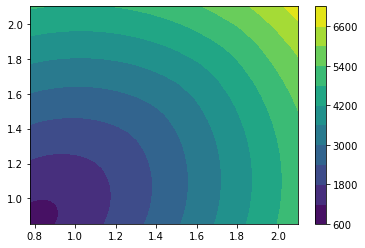

In [8]:
from matplotlib import cm
import scipy.interpolate

#x, y = np.linspace(X.min(), X.max(), 100), np.linspace(Y.min(), Y.max(), 100)
x,y = np.meshgrid(theeta0, theeta)
rbf = scipy.interpolate.Rbf(theeta0, theeta, costArr, function='linear')
z = rbf(x, y)
plt.contourf(x,y,z,10)
plt.colorbar()
plt.show()




Text(0.5, 0, 'Cost')

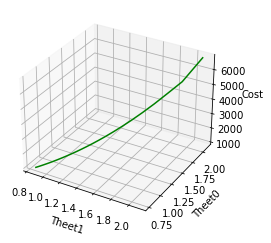

In [9]:
fig=plt.figure()
ax=plt.axes(projection='3d')
ax.plot3D(theeta,theeta0,costArr,'green')
ax.set_xlabel('Theet1')
ax.set_ylabel('Theet0')
ax.set_zlabel('Cost')


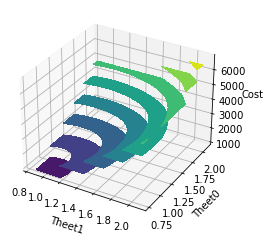

In [10]:
fig=plt.figure()
ax=fig.gca(projection='3d')
x,y = np.meshgrid(theeta, theeta0)
rbf = scipy.interpolate.Rbf(theeta, theeta0, costArr, function='linear')
z = rbf(x, y)
ax.contourf3D(theeta,theeta0,z)
ax.set_xlabel('Theet1')
ax.set_ylabel('Theet0')
ax.set_zlabel('Cost')
plt.show()


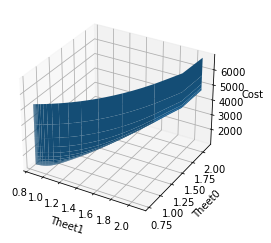

In [16]:
fig=plt.figure()
ax=fig.gca(projection='3d')
x,y = np.meshgrid(theeta0, theeta)
z = rbf(x, y)
ax.plot_surface(theeta,theeta0,z)
ax.set_xlabel('Theet1')
ax.set_ylabel('Theet0')
ax.set_zlabel('Cost')
plt.show()

In [37]:
#Evaluate the train model

def predict(x):
    return 0.78+(0.85*x)
newY=[]
for i in range(m):
    newY.append(predict(X[i]))

import sklearn.metrics as sm
print("Mean squared error =", round(sm.mean_squared_error(Y, newY), 2))
print("R2 score =", round(sm.r2_score(Y, newY), 2))

Mean squared error = 0.88
R2 score = 0.12
